In [52]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
annealing = fetch_ucirepo(id=3) 
  
# data (as pandas dataframes) 
X = annealing.data.features 
y = annealing.data.targets 
  
# metadata 
print(annealing.metadata) 
  
# variable information 
print(annealing.variables) 


{'uci_id': 3, 'name': 'Annealing', 'repository_url': 'https://archive.ics.uci.edu/dataset/3/annealing', 'data_url': 'https://archive.ics.uci.edu/static/public/3/data.csv', 'abstract': 'Steel annealing data', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 798, 'num_features': 38, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': None, 'last_updated': 'Mon Dec 23 2024', 'dataset_doi': '10.24432/C5RW2F', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "Attribute Listing:\n    1. family:          --,GB,GK,GS,TN,ZA,ZF,ZH,ZM,ZS\n    2. product-type:    C, H, G\n    3. steel:           -,R,A,U,K,M,S,W,V\n    4. carbon:          continuous\n    5. hardness:        continuous\n    6. temper_rolling:  -,T\n    7. condition:       -,S,A,X\n    8. formabili

In [53]:
print(X.shape)
print(y.shape)
print(X.columns)
print(y.columns)

(898, 38)
(898, 1)
Index(['famiily', 'product-type', 'steel', 'carbon', 'hardness',
       'temper-rolling', 'condition', 'formability', 'strength', 'non-ageing',
       'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt',
       'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro',
       'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape',
       'thick', 'width', 'len', 'oil', 'bore', 'packing'],
      dtype='object')
Index(['class'], dtype='object')


In [54]:
import pandas as pd
combines = pd.concat([X, y], axis=1)

In [55]:
combines.isnull().sum()

famiily                   772
product-type                0
steel                      86
carbon                      0
hardness                    0
temper-rolling            761
condition                 303
formability               318
strength                    0
non-ageing                793
surface-finish            889
surface-quality           244
enamelability             882
bc                        897
bf                        769
bt                        824
bw/me                     687
bl                        749
m                         898
chrom                     872
phos                      891
cbond                     824
marvi                     898
exptl                     896
ferro                     868
corr                      898
blue/bright/varn/clean    892
lustre                    847
jurofm                    898
s                         898
p                         898
shape                       0
thick                       0
width     

In [56]:
# exploring the data
combines.sample(10)

,famiily,product-type,steel,carbon,hardness,temper-rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,class
441,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,0.800,610.0,762,NaN,0,NaN,2
727,NaN,C,K,55,0,NaN,NaN,NaN,0,NaN,...,NaN,NaN,COIL,1.000,900.0,0,NaN,0,NaN,3
656,NaN,C,R,0,0,NaN,S,3.0,0,NaN,...,NaN,NaN,SHEET,0.800,610.0,1,NaN,0,NaN,2
51,NaN,C,NaN,0,0,NaN,S,1.0,0,NaN,...,NaN,NaN,SHEET,0.300,1320.0,761,NaN,0,NaN,3
68,NaN,C,A,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,COIL,0.400,20.0,0,NaN,0,NaN,3
864,NaN,C,NaN,0,0,NaN,S,1.0,0,NaN,...,NaN,NaN,SHEET,0.699,1300.0,4880,NaN,0,NaN,3
563,NaN,C,R,6,0,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,1.000,1320.0,762,NaN,0,NaN,3
240,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,3.200,1300.0,762,NaN,0,NaN,3
802,NaN,C,A,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,COIL,0.699,1320.0,0,NaN,0,NaN,3
303,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,0.800,1500.0,4170,NaN,0,NaN,2


In [57]:
# To check how many columns have missing values more than 70 % of the data
# Calculate the percentage of missing values for each column
missing_percentage = combines.isnull().mean() * 100

# Filter columns where the percentage of missing values is greater than 70%
columns_with_high_missing = missing_percentage[missing_percentage > 70].index

# Display the columns with more than 70% missing values
print("Columns with more than 70% missing values:")
print(len(columns_with_high_missing))

Columns with more than 70% missing values:
25


In [58]:
numeric_columns = combines.select_dtypes(include=['int64', 'float64']).columns
print(numeric_columns)
print("The number of numeric columns are",len(numeric_columns))

Index(['carbon', 'hardness', 'formability', 'strength', 'enamelability', 'm',
       'marvi', 'corr', 'jurofm', 's', 'p', 'thick', 'width', 'len', 'bore',
       'packing'],
      dtype='object')
The number of numeric columns are 16


In [59]:
# Calculate the percentage of missing values for each column
missing_percentage = combines.isnull().mean() * 100

# Filter columns where the percentage of missing values is greater than 90%
columns_to_drop = missing_percentage[missing_percentage > 90].index

# Drop those columns from the DataFrame
df_cleaned =combines.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)
df_cleaned.shape

Cleaned DataFrame:
    famiily product-type steel  carbon  hardness temper-rolling condition  \
0       NaN            C     A       8         0            NaN         S   
1       NaN            C     R       0         0            NaN         S   
2       NaN            C     R       0         0            NaN         S   
3       NaN            C     A       0        60              T       NaN   
4       NaN            C     A       0        60              T       NaN   
..      ...          ...   ...     ...       ...            ...       ...   
893     NaN            C     R       0         0            NaN         S   
894     NaN            C     R       0         0            NaN         S   
895     NaN            C     V       0         0            NaN         S   
896     NaN            C     A       0        85              T       NaN   
897     NaN            C     A       0        85              T       NaN   

     formability  strength non-ageing surface-quality   

(898, 20)

In [60]:
grouped = df_cleaned.groupby('class')
print(grouped.size())

class
1      8
2     99
3    684
5     67
U     40
dtype: int64


In [61]:
grouped.head()

,famiily,product-type,steel,carbon,hardness,temper-rolling,condition,formability,strength,non-ageing,surface-quality,bf,bw/me,bl,shape,thick,width,len,bore,class
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,G,NaN,NaN,NaN,COIL,0.700,610.0,0,0,3
1,NaN,C,R,0,0,NaN,S,2.0,0,NaN,E,NaN,NaN,NaN,COIL,3.200,610.0,0,0,3
2,NaN,C,R,0,0,NaN,S,2.0,0,NaN,E,Y,B,NaN,SHEET,0.700,1300.0,762,0,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,G,NaN,M,NaN,COIL,2.801,385.1,0,0,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,G,NaN,B,Y,SHEET,0.801,255.0,269,0,3
16,NaN,C,A,10,0,NaN,NaN,NaN,0,NaN,E,NaN,NaN,NaN,COIL,3.201,600.0,0,0,U
17,NaN,C,A,0,80,T,NaN,NaN,0,NaN,G,NaN,NaN,NaN,SHEET,0.800,610.0,4170,0,U
22,NaN,C,A,0,85,T,NaN,NaN,0,NaN,G,NaN,NaN,NaN,COIL,1.001,50.0,0,0,U
24,NaN,C,A,3,0,T,NaN,NaN,0,NaN,NaN,Y,NaN,NaN,COIL,0.500,610.0,0,0,1
30,TN,C,A,0,0,NaN,NaN,3.0,0,N,NaN,NaN,B,NaN,SHEET,0.600,610.0,4880,0,5


In [62]:
df_cleaned['shape'].isnull().sum()

np.int64(0)

In [63]:
group_shape = df_cleaned.groupby('shape')
print(group_shape.size())
group_shape.head()

shape
COIL     412
SHEET    486
dtype: int64


,famiily,product-type,steel,carbon,hardness,temper-rolling,condition,formability,strength,non-ageing,surface-quality,bf,bw/me,bl,shape,thick,width,len,bore,class
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,G,NaN,NaN,NaN,COIL,0.700,610.0,0,0,3
1,NaN,C,R,0,0,NaN,S,2.0,0,NaN,E,NaN,NaN,NaN,COIL,3.200,610.0,0,0,3
2,NaN,C,R,0,0,NaN,S,2.0,0,NaN,E,Y,B,NaN,SHEET,0.700,1300.0,762,0,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,G,NaN,M,NaN,COIL,2.801,385.1,0,0,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,G,NaN,B,Y,SHEET,0.801,255.0,269,0,3
5,NaN,C,A,0,45,NaN,S,NaN,0,NaN,D,NaN,NaN,NaN,COIL,1.600,610.0,0,0,3
6,NaN,C,R,0,0,NaN,S,2.0,0,NaN,E,NaN,NaN,Y,SHEET,0.699,610.0,4880,0,3
7,NaN,C,A,0,0,NaN,S,2.0,0,NaN,E,NaN,NaN,NaN,COIL,3.300,152.0,0,0,3
9,NaN,C,A,0,0,NaN,S,3.0,0,N,E,NaN,NaN,NaN,SHEET,1.000,1320.0,762,0,3
11,NaN,C,R,0,0,NaN,S,2.0,0,NaN,E,NaN,NaN,Y,SHEET,0.300,1320.0,4880,0,3


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df_cleaned['class_encode'] = encode.fit_transform(df_cleaned['class'])
df_cleaned["class_encode"]

0      2
1      2
2      2
3      2
4      2
      ..
893    1
894    1
895    1
896    4
897    4
Name: class_encode, Length: 898, dtype: int64

In [65]:
contingency_table = pd.crosstab(df_cleaned['thick'], df_cleaned['class'])
contingency_table

class,1,2,3,5,U
thick,,,,,
0.240,0,0,1,0,0
0.250,0,0,1,0,0
0.300,0,0,42,0,2
0.301,0,0,12,0,0
0.321,0,0,2,0,1
0.400,0,0,31,0,6
0.451,0,0,4,0,0
0.500,1,0,6,9,0
0.501,0,0,1,0,0


In [66]:
# Contigency table for the width and class
contingency_table = pd.crosstab(df_cleaned['width'], df_cleaned['class'])
contingency_table

class,1,2,3,5,U
width,,,,,
0.0,0,0,2,0,0
20.0,0,2,20,1,2
25.0,0,0,3,0,0
28.0,0,0,1,0,0
29.0,0,0,1,0,0
...,...,...,...,...,...
1310.0,0,0,1,0,0
1320.0,0,15,137,0,3
1320.1,0,0,3,0,0


In [67]:
steel_group = df_cleaned.groupby('steel')
steel_group.size()

steel
A    440
K     51
M     20
R    256
S     10
V     16
W     19
dtype: int64

In [68]:
pivot_table = df_cleaned.pivot_table(index='steel', columns='class', values='width', aggfunc='mean')
pivot_table

class,1,2,3,5,U
steel,,,,,
A,610.00,NaN,767.611396,622.79375,790.2425
K,NaN,NaN,760.492157,NaN,NaN
M,NaN,1009.090909,783.300000,NaN,NaN
R,915.05,909.404286,794.871196,NaN,NaN
S,288.96,NaN,829.980000,NaN,NaN
V,NaN,900.990000,964.966667,NaN,NaN
W,NaN,NaN,959.447368,NaN,NaN


<Axes: xlabel='class', ylabel='steel'>

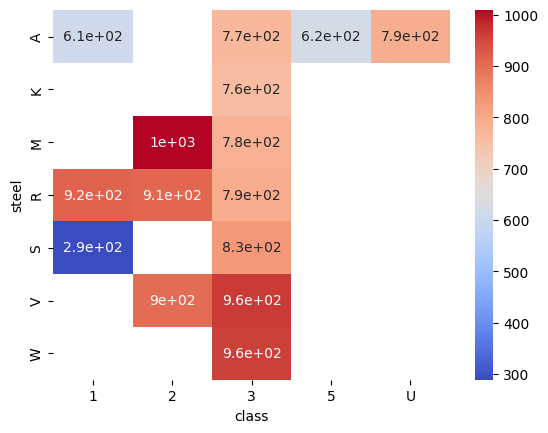

In [69]:
# Creating a heat map
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')


<Axes: xlabel='strength'>

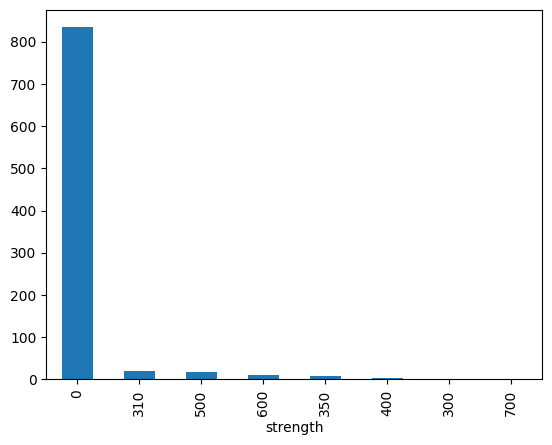

In [70]:
df_cleaned['strength'].value_counts(0).plot(kind='bar')

In [71]:
df_cleaned['strength'].isnull().sum()


np.int64(0)

In [72]:
important = df_cleaned[['shape','steel','carbon' ,'thick','formability', 'width', 'len', 'bore', 'hardness','class']]

In [73]:
important.isnull().sum()
important.shape

(898, 10)

In [74]:
# Filling the missing values of formadibility with the mode
important['formability'].fillna(important['formability'].mode()[0], inplace=True)
print(important['formability'].mode()[0])
print(important['formability'].mean())
print(important['formability'].median())

2.0
2.1425389755011137
2.0


C:\Users\Elvis\AppData\Local\Temp\ipykernel_23024\1417436228.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  important['formability'].fillna(important['formability'].mode()[0], inplace=True)
C:\Users\Elvis\AppData\Local\Temp\ipykernel_23024\1417436228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important['formability'].fillna(impor

In [75]:
important.isnull().sum()

shape           0
steel          86
carbon          0
thick           0
formability     0
width           0
len             0
bore            0
hardness        0
class           0
dtype: int64

In [77]:
important.dropna(subset=['steel'], inplace=True)

C:\Users\Elvis\AppData\Local\Temp\ipykernel_23024\1960487031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important.dropna(subset=['steel'], inplace=True)


In [80]:
# do a decision tree on this data
from sklearn.model_selection import train_test_split    
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# categorical columns in important
categorical = important.select_dtypes(include=['object']).columns
print(categorical)
important['class'] = encode.fit_transform(important['class'])
important['shape'] = encode.fit_transform(important['shape'])
important['steel'] = encode.fit_transform(important['steel'])

X = important.drop(columns='class')
y = important['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Index([], dtype='object')
Accuracy: 0.8957055214723927


C:\Users\Elvis\AppData\Local\Temp\ipykernel_23024\2703931089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important['class'] = encode.fit_transform(important['class'])
C:\Users\Elvis\AppData\Local\Temp\ipykernel_23024\2703931089.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important['shape'] = encode.fit_transform(important['shape'])
C:\Users\Elvis\AppData\Local\Temp\ipykernel_23024\2703931089.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr